<a href="https://colab.research.google.com/github/OKleg/CV_lab2/blob/main/cv_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Морфологические преобразования

Следует реализовать выделение проблемных зубьев у шестеренки. Пример разобран на лекции.

Описание есть у Стокмана.

Использовать только морфологические операции для бинарных изображений.

Можно использовать для этого функции OpenCV, например:

**Erode** -- размывание(операция сужения)

**Dilate** -- растягивание(операция расширения)

и др.

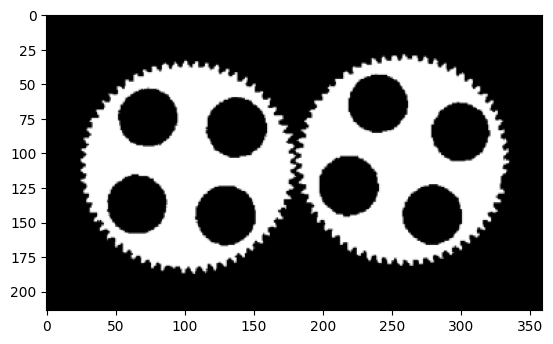

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
def loading(path):
    return cv2.imread(path, cv2.IMREAD_REDUCED_COLOR_2)
image = loading("Шестеренки.png")
plt.imshow(image)
plt.show()

1
2


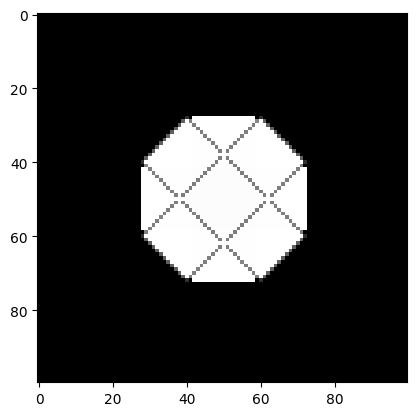

In [ ]:
size = 15

start_point = (50 - size - size//2, 50 - size + size//2)
end_point   = (50 + size + size//2, 50 + size - size//2)

color = (255,255,255)
thickness = -1

rect = [0,0,0]

rect[0] = cv2.rectangle(np.zeros((100,100),np.uint8),start_point,end_point,color, thickness)
hole_mask = rect[0][:]
# Поворот прямоугольника
for i in range(1,3):
  angle = i*45
  (center_x, center_y) = ((start_point[0] + end_point[0]) // 2, (start_point[1] + end_point[1]) // 2)
  rotation_matrix = cv2.getRotationMatrix2D((center_x, center_y), angle, 1.0)
  rect[i] = cv2.warpAffine(rect[0], rotation_matrix, (rect[0].shape[1], rect[0].shape[0]))
  print(i)
  hole_mask += rect[i]
plt.imshow(hole_mask,cmap=plt.cm.binary_r)

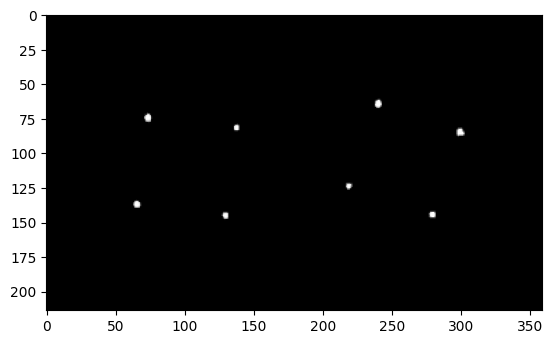

In [ ]:
hole_ring = cv2.circle(np.zeros((100,100),np.uint8),(50,50),25,(255,255,255))

B1 = cv2.erode(image, hole_ring)
plt.imshow(B1)

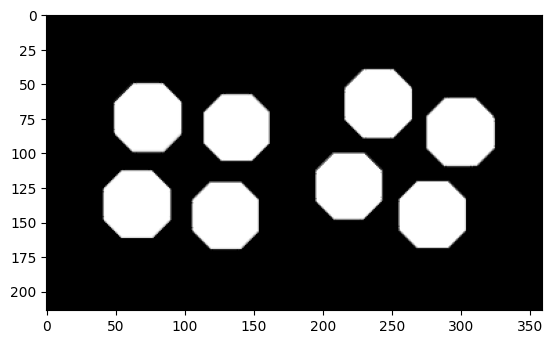

In [ ]:
hole_mask += cv2.circle(np.zeros((100,100),np.uint8),(50,50),22,(255,255,255),-1)
B2 = cv2.dilate(B1, hole_mask)
plt.imshow(B2)

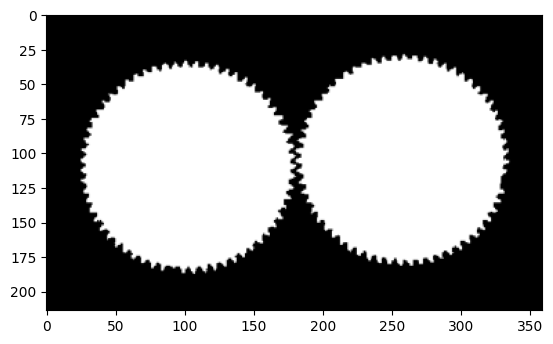

In [ ]:
B3 = cv2.bitwise_or(image,B2)
plt.imshow(B3)

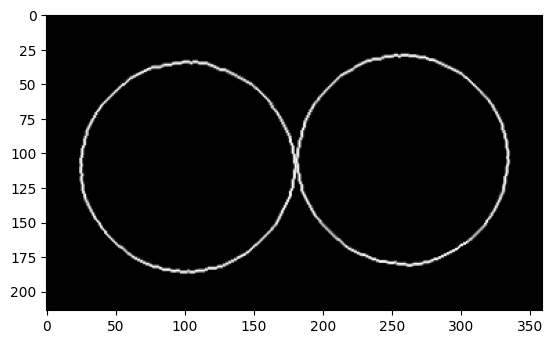

In [ ]:
gear_body = cv2.circle(np.zeros((100,100),np.uint8),(50,50),25,(255,255,255))
B4 = cv2.dilate(cv2.erode(B3,gear_body),gear_body)

sampling_ring_spacer = cv2.circle(np.zeros((100,100),np.uint8),(50,50),2,(255,255,255))
B5 = cv2.dilate(B4,sampling_ring_spacer)

sampling_ring_width = cv2.circle(np.zeros((100,100),np.uint8),(50,50),2,(255,255,255))
B6 = cv2.dilate(B5,sampling_ring_width)

B7 = cv2.bitwise_and(B6,cv2.bitwise_xor(B6,B5))
plt.imshow(B7)

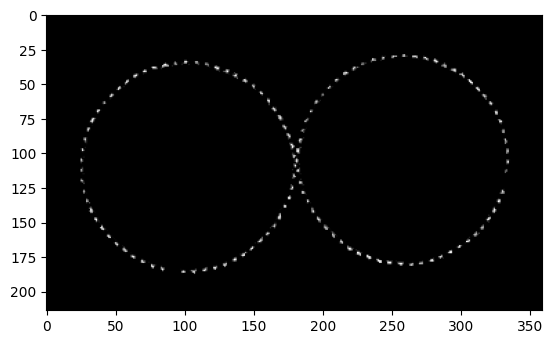

In [ ]:
B8 = cv2.bitwise_and(image, B7)

plt.imshow(B8)

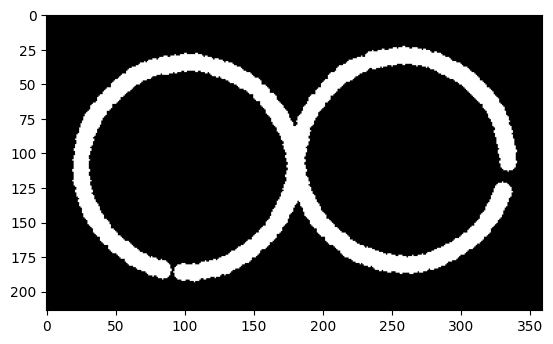

In [ ]:
tip_spacing = cv2.circle(np.zeros((100,100),np.uint8),(50,50),6,(255,255,255),-1)

B9 = cv2.dilate(B8,tip_spacing)
B9 = cv2.threshold(B9,127,255,cv2.THRESH_BINARY)[1]
plt.imshow(B9)

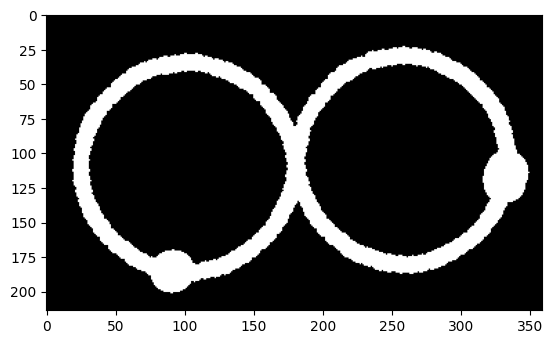

In [ ]:
defect_cue = cv2.circle(np.zeros((100,100),np.uint8),(50,50),15,(255,255,255),-1)

B10 = cv2.bitwise_or(cv2.dilate(cv2.bitwise_and(B7,cv2.bitwise_xor(B7,B9)),defect_cue),B9)

B10 = cv2.threshold(B10,127,255,cv2.THRESH_BINARY)[1]

plt.imshow(B10 )